# Anomaly Detection in Transactions
- Anomaly detection in transactions means identifying unusual or unexpected patterns within transactions or related activities. These patterns, known as anomalies or outliers, deviate significantly from the expected norm and could indicate irregular or fraudulent behaviour.

- Let’s get started with the task of anomaly detection in transactions by importing the necessary Python libraries and the dataset

In [25]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Now, let's read the dataset

In [26]:
# read daraset
data = pd.read_csv('transaction_anomalies_dataset.csv')
data.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


- Now, let's have a look at the information of our dataset

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


- As you can see from the above information our data doesn't contain any null values, or we can also have a look if the data has any null values diretly

In [28]:
data.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

- there are no missing values from our data, now let's have a look at the descriptive statistics of the data

In [29]:
data.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


- Now let’s have a look at the distribution of transactions amount in the data

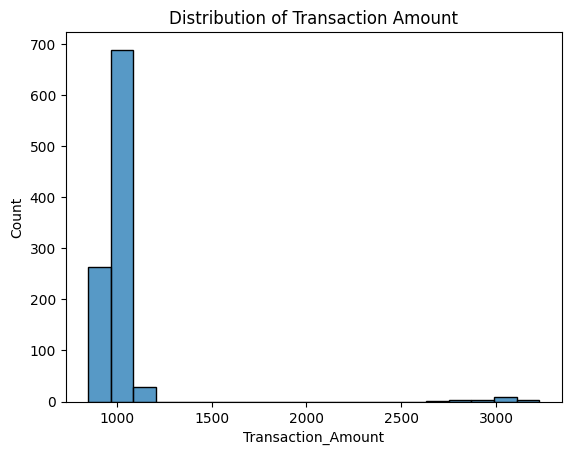

In [30]:
sns.histplot(data=data, x='Transaction_Amount', bins=20)
plt.title('Distribution of Transaction Amount')
plt.show()

- Now let’s have a look at the distribution of transactions amount by account type

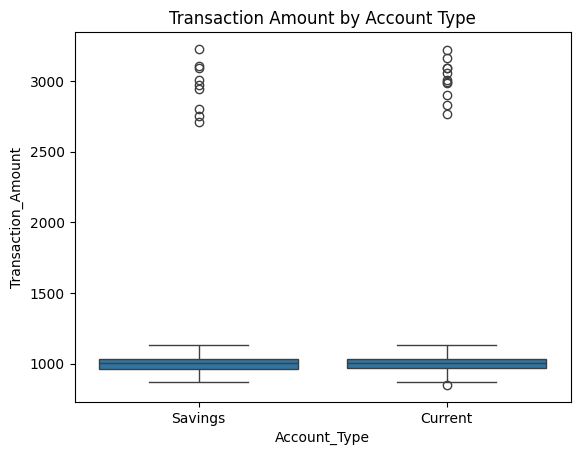

In [31]:
sns.boxplot(data, x='Account_Type', y='Transaction_Amount')
plt.title('Transaction Amount by Account Type')
plt.show()

- Now let’s have a look at the average transaction amount by age

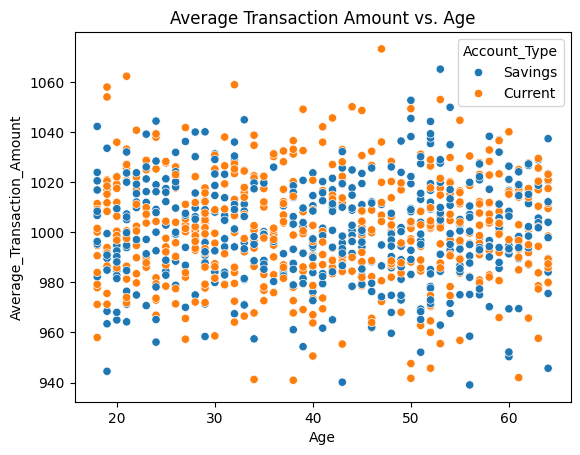

In [32]:
# Averqage Transaction Amount vs. Age
sns.scatterplot(data=data, x='Age', y='Average_Transaction_Amount', hue='Account_Type')
plt.title('Average Transaction Amount vs. Age')
plt.show()

- There’s no difference in the average transaction amount by age. Now let’s have a look at the count of transactions by day of the week

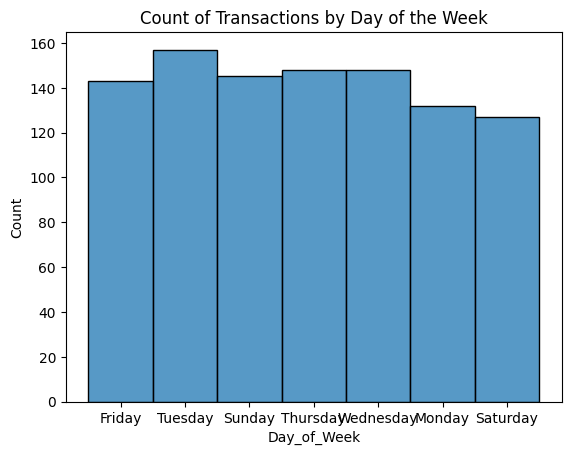

In [33]:
sns.histplot(data=data, x='Day_of_Week')
plt.title('Count of Transactions by Day of the Week')
plt.show()

- Now let’s have a look at the correlation between all the columns in the data

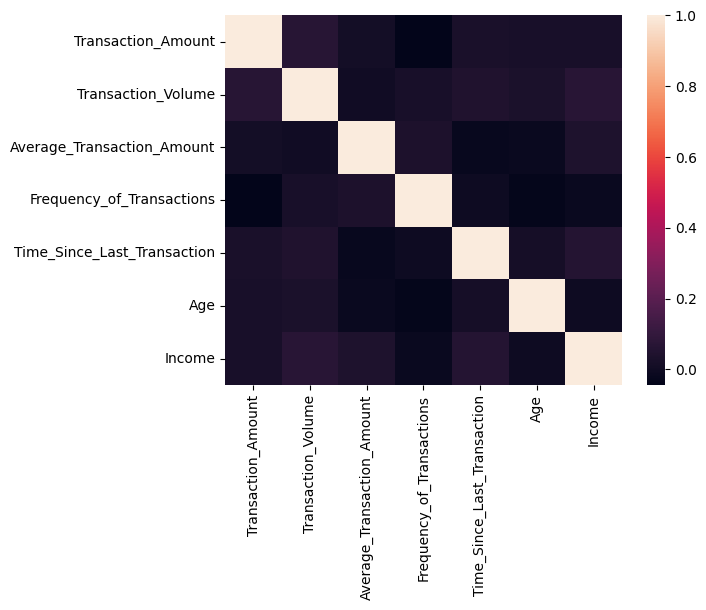

In [34]:
numerical_features = data.select_dtypes(include=["int64", "float64"])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix)
plt.show()

- Now here’s how we can visualize anomalies in the data

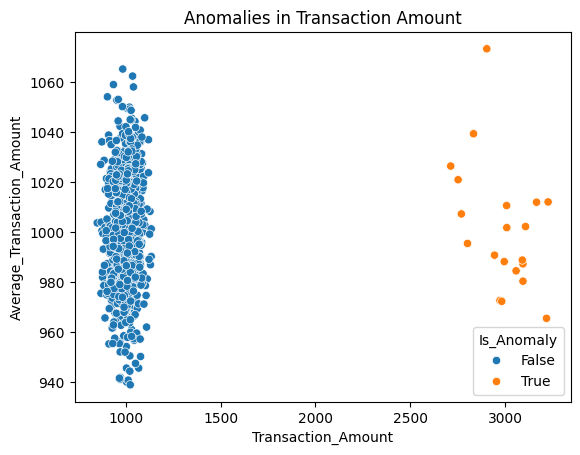

In [35]:
# calculate mean and standard deviation of Transaction Amount
mean_amount = data['Transaction_Amount'].mean()
std_amount = data['Transaction_Amount'].std()

# Define the anomaly threshold (2 standard deviations from the mean)
anomaly_threshold = mean_amount + 2 * std_amount

# Flag anomalies
data['Is_Anomaly'] = data['Transaction_Amount'] > anomaly_threshold

# Scatter plot of Transaction Amount with anomalies highlighted
sns.scatterplot(data, x='Transaction_Amount', y='Average_Transaction_Amount', hue='Is_Anomaly')
plt.title('Anomalies in Transaction Amount')
plt.show()


- Now let’s calculate the number of anomalies in the data to find the ratio of anomalies in the data, which will be useful while using anomaly detection algorithms like isolation forest

In [36]:
# calcualte the number of anomalies
num_anomalies = data['Is_Anomaly'].sum()

# Calculate the total number of instances inthe data
total_instances = data.shape[0]

# Calcualte the ratio of anomalies
anomaly_ratio = num_anomalies / total_instances
print('Anomaly ratio: ', anomaly_ratio)

Anomaly ratio:  0.02


# Model Training
- Now here’s how we can train a Machine Learning model for detecting anomalies

In [37]:
# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest


# Split the data into features (X) and target variable (y)
X = data [['Transaction_Amount','Average_Transaction_Amount','Frequency_of_Transactions']]
y = data['Is_Anomaly']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.02, random_state=42)

- Here we are training an anomaly detection model using the Isolation Forest algorithm. First, we selected the relevant features for detection, namely Transaction_Amount, Average_Transaction_Amount, and Frequency_of_Transactions.

- We split the dataset into features (X) and the target variable (y), where X contains the selected features and y contains the binary labels indicating whether an instance is an anomaly or not. Then, we further split the data into training and testing sets using an 80-20 split ratio. Next, we created an Isolation Forest model with a specified contamination parameter of 0.02 (indicating the expected ratio of anomalies) and a random seed for reproducibility. The model is then trained on the training set (X_train).

- Now let’s have a look at the performance of this anomaly detection model

In [39]:
# import necessary library
from sklearn.metrics import classification_report

# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0: normal, 1: anomaly)
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

# Evaluate the model's performance
report = classification_report(y_test,y_pred_binary, target_names=['Normal', 'Anomaly'])
print(report)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



- Finally, here’s how we can use our trained model to detect anomalies

In [40]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
  user_input = float(input(f"Enter the value for '{feature}': "))
  user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
  print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
  print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount': 20000
Enter the value for 'Average_Transaction_Amount': 1000
Enter the value for 'Frequency_of_Transactions': 8
Anomaly detected: This transaction is flagged as an anomaly.
